### INTRODUCTION

This is part of a series in the Nigeria data professionals ecosystem project . The scraping was ran twice with different job titles so as to gather more data, with more diversity in the data fields

The project focus on taking a deep dive into analyzing Job applications in the Nigeria tech industry and extracting insights from the stated Job requirements

In [77]:
import pandas as pd
import re
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mp
mp.rcParams['figure.figsize'] = (10,6)
plt.style.use ('ggplot')

In [2]:
df=pd.read_csv('Uncleaned_Data.csv')

In [3]:
df.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Company Name,Location
0,0,0,Data Projects Delivery Manger,-1,I’Tech Delta Investment Ltd,Lagos
1,1,1,RESEARCH AND DATA INPUT STAFF,-1,Team Ace,Lagos
2,2,2,Data Analyst – DAAB222,-1,DelonJobs,Lagos
3,3,3,"Junior Data Engineer - QuantumBlack, AI by McK...",Size\n201 to 500 Employees\nFounded\n2009\nTyp...,McKinsey & Company\n4.4,Lagos
4,4,4,Data Analyst,-1,Kimberly Ryan Limited,Lagos


In [4]:
df.drop(['index','Unnamed: 0'],axis=1, inplace=True)

In [9]:
df.columns =[column.replace(" ", "_") for column in df.columns]

In [10]:
# clean the job title and company name with simple regex
df['Company_Name']=df['Company_Name'].str.replace('(\n.*$)'," ",regex=True)
df['Company_Name']=df['Company_Name'].str.replace('(is\s[^\n]+)'," ",regex=True)
df["Job_Title"]=df["Job_Title"].str.replace('(-\s[^\n]+)|at\s[^\n]+',' ', regex=True)
df["Job_Title"]=df["Job_Title"].str.replace('(–\s[^\n]*)|\d',' ', regex=True)

In [11]:
df.duplicated().sum()

841

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df["Job_Title"]=df["Job_Title"].str.lower()

In [80]:
df[df['Job_Title'].str.contains('Data eng')]

,Job_Title,Salary_Estimate,Company_Name,Location


A financial analyst deals more with investments while a business analyst deals more with operations and management. We will only be considering business analyst has its roles suggest more reliance on data tools .

Data architects design the vision and blueprint of the organization's data framework, while the data engineer is responsible for creating that vision. The role also relies on data visualization, data migration and RDMSs,so we will keep it

After analyzing the data the senior, junior and intern roles are very few, and as such will be merged with their rspective roles as they wouldnt affect the outcome of the data.

These are the roles we will be interested in

Data analyst, Data engineer, Machine learning engineer, Data scientist, Business analyst, Data architect

In [14]:
# A function that replaces the job title if it contains a certain sub string.
def replace_title(title):
    # Lowercase the titles first to keep consistency    
 
    if 'data scientist' in title or 'data science' in title: 
        return 'Data Scientist'
    elif 'machine' in title or 'machine learning' in title:
        return 'Machine learning engineer'
    elif 'data engineer' in title:
        return 'Data Engineer' 
    elif 'data analyst' in title:
        return 'Data analyst'
    elif 'architect' in title:
        return 'Data Architect'
    elif 'business analyst' in title or 'bi analyst'in title :
        return 'Business Analyst'
    elif 'intern' in title:
        return 'Data Scientist'
    elif 'ict'in title:
        return 'Data analyst'
    else:
        return title

# Apply function to title column
df['Job_Title'] = df['Job_Title'].apply(replace_title)

In [15]:
# create a list of the required jobs
Data=['Data analyst','Data Engineer','Machine learning engineer','Data Scientist','Business Analyst','Data Architect']

In [16]:
df1=df[df['Job_Title'].isin(Data)]

In [17]:
df1[:50]

,Job_Title,Salary_Estimate,Company_Name,Location
2,Data analyst,-1,DelonJobs,Lagos
3,Data Engineer,Size\n201 to 500 Employees\nFounded\n2009\nTyp...,McKinsey & Company,Lagos
4,Data analyst,-1,Kimberly Ryan Limited,Lagos
5,Data Scientist,-1,Treehouse Limited,Lagos
6,Data Scientist,-1,Teams,Lagos
8,Data analyst,Size\n51 to 200 Employees\nFounded\n2011\nType...,Iubenda,Nigeria
9,Data Architect,-1,I’Tech Delta Investment Ltd,Lagos
13,Data analyst,-1,Africa Resource Company,Lagos
16,Data analyst,Size\nUnknown\nType\nCompany - Public\nRevenue...,Reposebay,Lagos
19,Data analyst,-1,Scruples Resources,Lagos


In [18]:
df1['Salary_Estimate']

2                                                     -1
3      Size\n201 to 500 Employees\nFounded\n2009\nTyp...
4                                                     -1
5                                                     -1
6                                                     -1
8      Size\n51 to 200 Employees\nFounded\n2011\nType...
9                                                     -1
13                                                    -1
16     Size\nUnknown\nType\nCompany - Public\nRevenue...
19                                                    -1
21     Size\n51 to 200 Employees\nFounded\n2016\nType...
22     Size\n201 to 500 Employees\nType\nCompany - Pr...
25     Size\nUnknown\nType\nCompany - Public\nRevenue...
26                                                    -1
27                                                    -1
30     Size\n201 to 500 Employees\nFounded\n2014\nTyp...
33     Size\n10000+ Employees\nFounded\n1966\nType\nC...
37     Size\n1001 to 5000 Emplo

In [19]:
from fuzzywuzzy import fuzz
# list of sectors to match
tools = ['Business Consulting','Management & Consulting','Banking & Lending','Financial Services','Financial Transaction Processing','Health services','Internet & Web Services','Information Technology','Research & Development',
         'Computer Hardware Development','Education & Training Services','Education','Accounting & Tax','Consumer Product Manufacturing','Manufacturing','Hospital','Nonprofit Organization','Food & Beverage Manufacturing',
        'HR Consulting','Human Resources & Staffing','Health Care Products Manufacturing','Taxi & Car Services','Transportation & Logistics','Investment & Asset Management','Electronics Manufacturing','Private Practice / Firm',
         'Architectural & Engineering Services','Construction, Repair & Maintenance Services','Civic & Social Services','Nonprofit & NGO','Cable, Internet & Telephone Providers','Telecommunications','Information Technology Support Services']



def match_phrases(description, phrases):
    matched_phrase = [phrase for phrase in phrases if fuzz.partial_token_set_ratio(description, phrase) >= 90]
    # Only return matches once
    unique_matches = list(set(matched_phrase))
    return unique_matches

df1['Industry'] = df1['Salary_Estimate'].apply(lambda x: match_phrases(x, tools))

C:\Users\Lawalson\AppData\Local\Temp/ipykernel_8072/3137408084.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Industry'] = df1['Salary_Estimate'].apply(lambda x: match_phrases(x, tools))


In [20]:
import collections
# Visualization functions
    
# Function used to generate countplot 
def generate_countplot(df, column, top_n = None):
    words = [word for row in df[column] for word in row]
    
    counter = collections.Counter(words)
    
    top_n_words = [word for word, count in counter.most_common(top_n)]
    
    plt.figure(figsize = (10,5))
    
    sns.countplot(x = words, order = top_n_words)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.show()

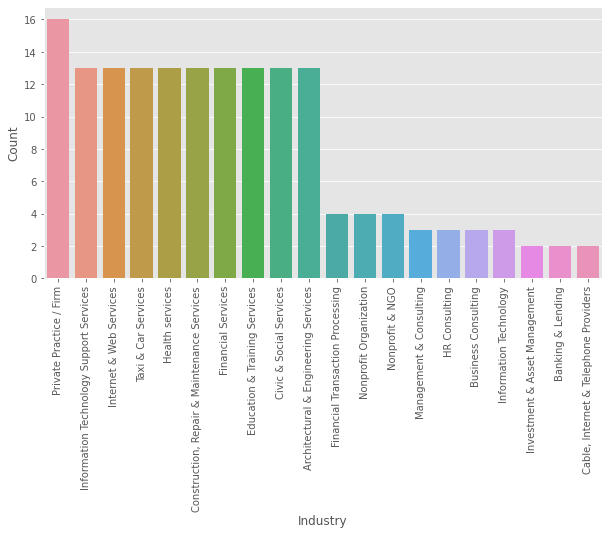

In [22]:
generate_countplot(df1, 'Industry', 20)

The results from the Industry/sector where data professionals are being mostly requested

Private practice / Firm tops the chart 
with sectors such as IT , Health services , Financial services etc following closely behind

In [23]:
df1

,Job_Title,Salary_Estimate,Company_Name,Location,Industry
2,Data analyst,-1,DelonJobs,Lagos,[]
3,Data Engineer,Size\n201 to 500 Employees\nFounded\n2009\nTyp...,McKinsey & Company,Lagos,"[Investment & Asset Management, Management & C..."
4,Data analyst,-1,Kimberly Ryan Limited,Lagos,[]
5,Data Scientist,-1,Treehouse Limited,Lagos,[]
6,Data Scientist,-1,Teams,Lagos,[]
8,Data analyst,Size\n51 to 200 Employees\nFounded\n2011\nType...,Iubenda,Nigeria,"[Information Technology Support Services, Inte..."
9,Data Architect,-1,I’Tech Delta Investment Ltd,Lagos,[]
13,Data analyst,-1,Africa Resource Company,Lagos,[]
16,Data analyst,Size\nUnknown\nType\nCompany - Public\nRevenue...,Reposebay,Lagos,[]
19,Data analyst,-1,Scruples Resources,Lagos,[]


During the course of the project some new jobs were added on the site , instead of running the scrape again which might not get these new jobs we will just append them to this dataset

In [67]:
New_d={'Job_Title' :['Data analyst', 'Data Engineer', 'Data analyst', 'Data Engineer','Data Scientist','Business Analyst','Data Scientist','Data Scientist','Data Architect','Data analyst','Business Analyst','Data analyst','Data Engineer', 'Data analyst','Data Engineer'],
'Company_Name':['Global Profilers','Transsion Holdings','Team Ace','Paystack','Loctech Nigeria Limited','Alpha mead','Palladium','mDoc Healthcare','ipNX','ipNX','ipNX','NTT data services','Groundspeed Analytics','NewGlobe','DelonJobs'],
'Location' :[ 'Lagos','Lagos','Lagos','Abuja','Rivers','Lagos','Abuja','Lagos','Lagos','Lagos','Lagos','Crossriver','Lagos','Lagos','Lagos'],
'Industry':['Private Practice / Firm','Information Technology','Private Practice / Firm','Information Technology Support Services','Education & Training Services','Private Practice / Firm','Private Practice / Firm','Health services','Information Technology','Information Technology','Information Technology','IT service management','Internet & Web Services','Education & Training Services','Private Practice / Firm']}
New_d=pd.DataFrame(New_d)

In [68]:
New_d

,Job_Title,Company_Name,Location,Industry
0,Data analyst,Global Profilers,Lagos,Private Practice / Firm
1,Data Engineer,Transsion Holdings,Lagos,Information Technology
2,Data analyst,Team Ace,Lagos,Private Practice / Firm
3,Data Engineer,Paystack,Abuja,Information Technology Support Services
4,Data Scientist,Loctech Nigeria Limited,Rivers,Education & Training Services
5,Business Analyst,Alpha mead,Lagos,Private Practice / Firm
6,Data Scientist,Palladium,Abuja,Private Practice / Firm
7,Data Scientist,mDoc Healthcare,Lagos,Health services
8,Data Architect,ipNX,Lagos,Information Technology
9,Data analyst,ipNX,Lagos,Information Technology


In [27]:
df1.drop('Salary_Estimate',axis=1, inplace=True)

C:\Users\Lawalson\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [69]:
df2=df1.append(New_d,ignore_index=True)

In [70]:
df2

,Job_Title,Company_Name,Location,Industry
0,Data analyst,DelonJobs,Lagos,[]
1,Data Engineer,McKinsey & Company,Lagos,"[Investment & Asset Management, Management & C..."
2,Data analyst,Kimberly Ryan Limited,Lagos,[]
3,Data Scientist,Treehouse Limited,Lagos,[]
4,Data Scientist,Teams,Lagos,[]
...,...,...,...,...
59,Business Analyst,ipNX,Lagos,Information Technology
60,Data analyst,NTT data services,Crossriver,IT service management
61,Data Engineer,Groundspeed Analytics,Lagos,Internet & Web Services
62,Data analyst,NewGlobe,Lagos,Education & Training Services


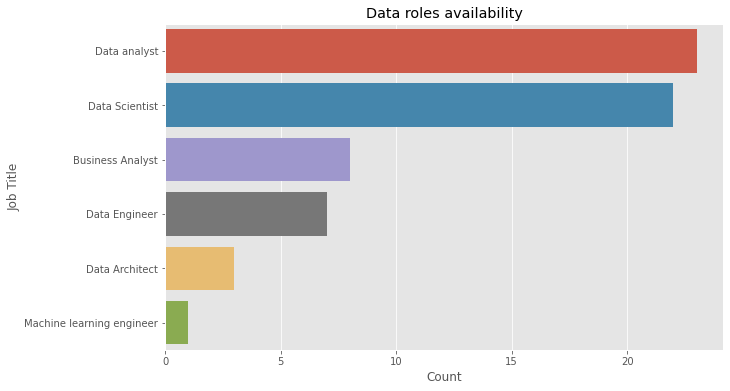

In [66]:
# Plot histogram of the different job titles in the dataset
sns.countplot(y= 'Job_Title', data = df2, order = df2['Job_Title'].value_counts().index)

# Add labels and titles
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Data roles availability')

plt.show()

In [73]:
df2['Location']=df2['Location'].str.replace('Osogbo', 'Osun')
df2['Location']=df2['Location'].str.replace('Lekki', 'Lagos')

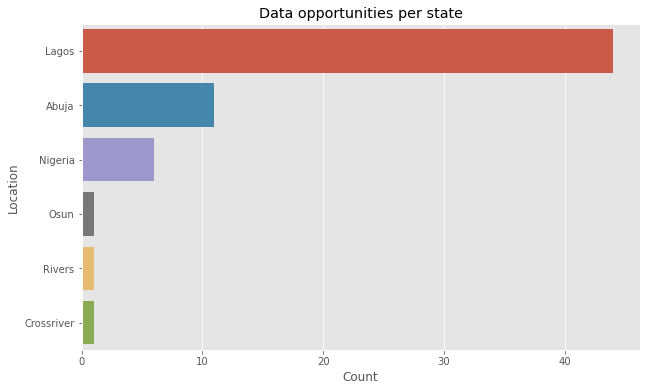

In [74]:
sns.countplot(y= 'Location', data = df2, order = df2['Location'].value_counts().index)

# Add labels and titles
plt.xlabel('Count')
plt.ylabel('Location')
plt.title('Data opportunities per state')

plt.show()

In [75]:
red=df2.groupby(['Location', 'Job_Title']).count().rename(columns={'Company_Name':'Count'}).reset_index()

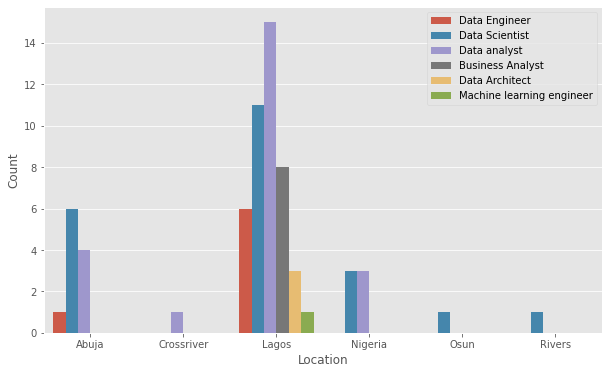

In [76]:
sns.barplot(data=red,x='Location',y='Count',hue='Job_Title')
plt.legend(loc=1)

Its safe to say that Lagos is the technological Hub of Nigeria